In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df  = pd.read_excel(r"C:\Users\lenovo\Desktop\分省净销售额.xlsx")
df.head()

,收件省份,2021,2022,2023
0,广东省,4024.114566,4654.918657,1735.756260
1,江苏省,3338.719201,3597.863206,1372.742621
2,浙江省,2536.225925,3281.454071,1393.644142
3,山东省,2054.185335,2101.684300,892.496155
4,上海,1535.047970,1455.666726,628.031478


In [13]:
df1 = df.iloc[:,1:3]
df1.head()

,2021,2022
0,4024.114566,4654.918657
1,3338.719201,3597.863206
2,2536.225925,3281.454071
3,2054.185335,2101.684300
4,1535.047970,1455.666726


**散点图**

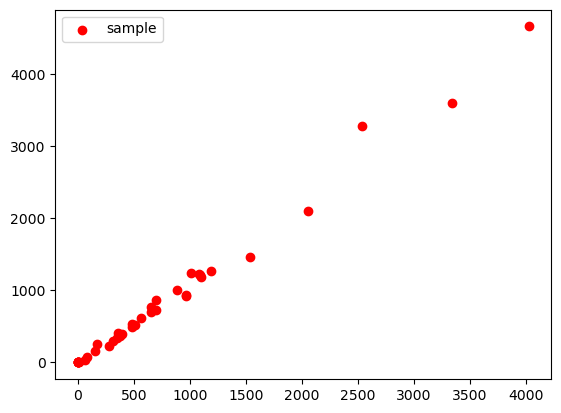

In [59]:
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c="red",marker="o",label="sample")
plt.legend()
plt.show()

KMeans是一种常见的聚类算法，适用于许多场景，例如：

1. 分析和理解数据集的结构；

2. 检测异常值和异常情况；

3. 用户行为分析；

4. 图像分割；

5. DNA序列分析等。

KMeans算法的好处是实现简单、可伸缩性好、速度快，并且在处理大型数据集时效果优异。

然而，KMeans算法也存在一些缺点：

1. 需要预先指定簇的数量，过多或过少都会导致效果不佳；

2. 对于密度不相等、尺寸不相等和类内方差不相等的簇不适用；

3. 对于非球形、不规则形状的簇，效果不佳；

4. 对于噪声、异常值敏感，需要对数据进行预处理。

因此，在使用KMeans算法时，需要根据具体问题的特征和数据集属性进行评估和预处理，以便获得最好的聚类结果。在实际应用中也会与其他聚类算法一起使用，以最终得到最佳的聚类结果。

**寻找合适的K值**  
随着聚类数K的增大，样本划分会更加精细，每个簇的聚合程度会逐渐提高，那么误差平方和**SSE**自然会逐渐变小。并且，当K小于真实聚类数时，由于K的增大会大幅增加每个簇的聚合程度，故SSE的下降幅度会很大，而当K到达真实聚类数时，再增加K所得到的聚合程度回报会迅速变小，所以SSE的下降幅度会骤减，然后随着K值的继续增大而趋于平缓，也就是说SSE和K的关系图是一个手肘的形状，这也是该方法被称为手肘法的原因，而这个肘部对应的K值就是数据的真实聚类数，
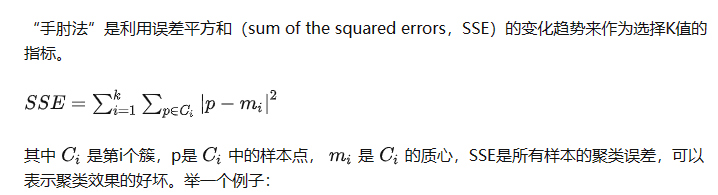

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

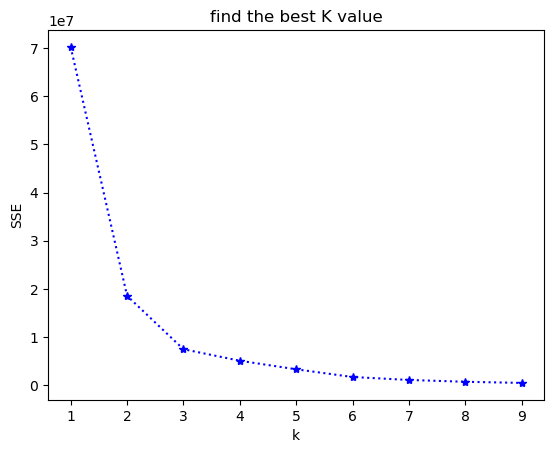

In [44]:
num = range(1,10)
sse_result = []
for k  in num:
    kmeans  = KMeans(n_clusters=k)
    kmeans.fit(df1)
    sse_result.append(kmeans.inertia_)#inertia_表示样本到最近的聚类中心的距离总和
plt.plot(num,sse_result,"b*:")#'b*:'为线的格式设置，b表示蓝色，*为点的标记，:表示线型为点状线条。
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("find the best K value")
plt.show()

In [52]:
# 设置类别数
k0 = 3
k1 = 4
k2 = 5
# 训练k均值模型
kmeans_0 = KMeans(n_clusters=k0, random_state=0).fit(df1)
kmeans_1 = KMeans(n_clusters=k1, random_state=0).fit(df1)
kmeans_2 = KMeans(n_clusters=k2, random_state=0).fit(df1)
# 输出结果
result0 = print(kmeans_0.labels_)
result1 = print(kmeans_1.labels_)
result2 = print(kmeans_2.labels_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

[2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[2 2 2 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[4 2 2 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0]


In [54]:
df["cluster0"] = kmeans_0.labels_
df["cluster1"] = kmeans_1.labels_
df["cluster2"] = kmeans_2.labels_
df.head(10)

,收件省份,2021,2022,2023,cluster,cluster2,cluster0,cluster1
0,广东省,4024.114566,4654.918657,1735.756260,2,4,2,2
1,江苏省,3338.719201,3597.863206,1372.742621,2,2,2,2
2,浙江省,2536.225925,3281.454071,1393.644142,2,2,2,2
3,山东省,2054.185335,2101.684300,892.496155,1,1,0,1
4,上海,1535.047970,1455.666726,628.031478,1,1,0,1
5,四川省,1191.541538,1273.889102,578.868416,1,1,0,1
6,湖北省,1099.813324,1191.184682,554.339418,1,1,0,1
7,安徽省,1090.900001,1217.401745,513.777753,1,1,0,1
8,北京,1081.770883,1229.994965,476.803098,1,1,0,1
9,湖南省,1008.872649,1234.353981,458.832634,1,1,0,1


可以增加k为4时的散点图情况

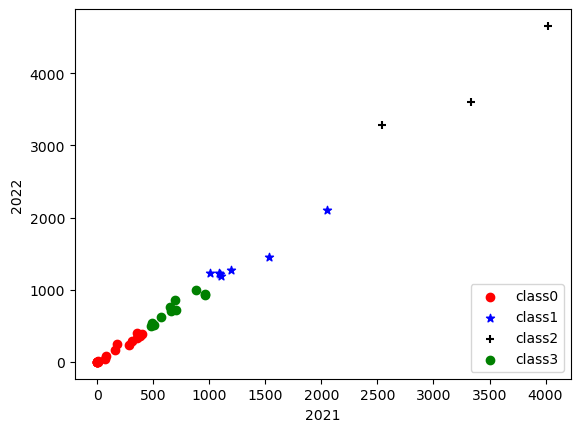

In [74]:
plt.scatter(df[df["cluster1"]==0].iloc[:,1],df[df["cluster1"]==0].iloc[:,2],c="red",marker="o",label="class0")
plt.scatter(df[df["cluster1"]==1].iloc[:,1],df[df["cluster1"]==1].iloc[:,2],c="blue",marker="*",label="class1")
plt.scatter(df[df["cluster1"]==2].iloc[:,1],df[df["cluster1"]==2].iloc[:,2],c="black",marker="+",label="class2")
plt.scatter(df[df["cluster1"]==3].iloc[:,1],df[df["cluster1"]==3].iloc[:,2],c="green",marker="o",label="class3")
plt.xlabel("2021")
plt.ylabel("2022")
plt.legend(loc=4)
plt.show()

In [55]:
df.to_excel(r"C:\Users\lenovo\Desktop\分省净销售额2.xlsx")

参考资料：  
https://zhuanlan.zhihu.com/p/159387112  
https://blog.csdn.net/weixin_52398581/article/details/122246255  
https://zhuanlan.zhihu.com/p/38668500?utm_id=0  